In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:] # petal length and width (평면에 그리려고 2개만 사용)
labels = iris.target



In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [5]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [6]:
import numpy as np 

np.unique(y_test, return_counts=True) # 0, 1, 2가 각각 10개씩 있음

(array([0, 1, 2]), array([ 9,  8, 13], dtype=int64))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, 
                                                    stratify=labels, # 레이블의 비율을 맞춰줌
                                                    random_state=13)

In [8]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [9]:
import numpy as np 

np.unique(y_test, return_counts=True) # 0, 1, 2가 각각 10개씩 있음

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [10]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train) # 학습


DecisionTreeClassifier(max_depth=2, random_state=13)

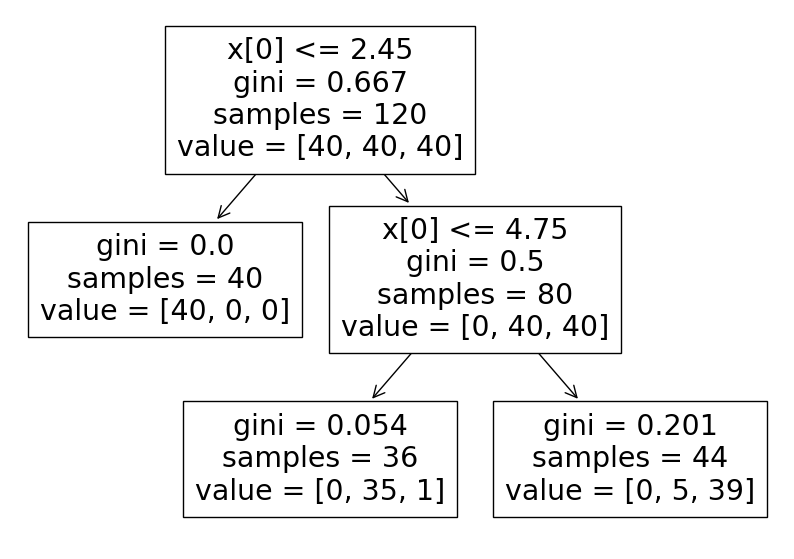

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plot_tree(iris_tree);

In [13]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr) # 0.95

0.95

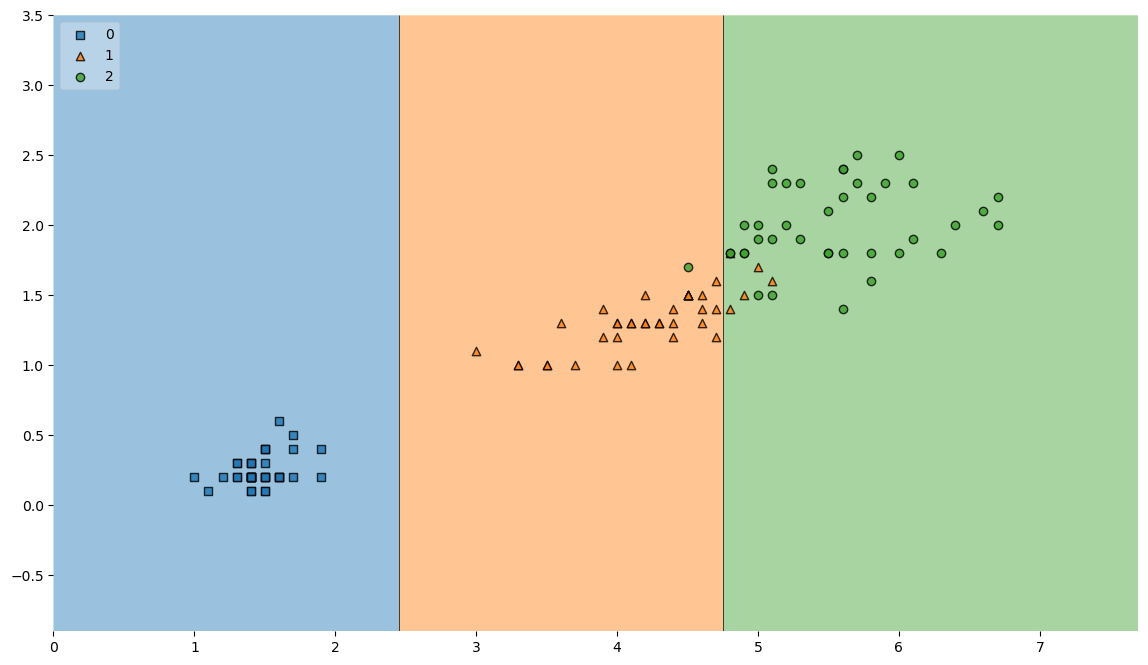

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show() # 결정경계를 그림

In [15]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test) # 0.9666666666666667

0.9666666666666667

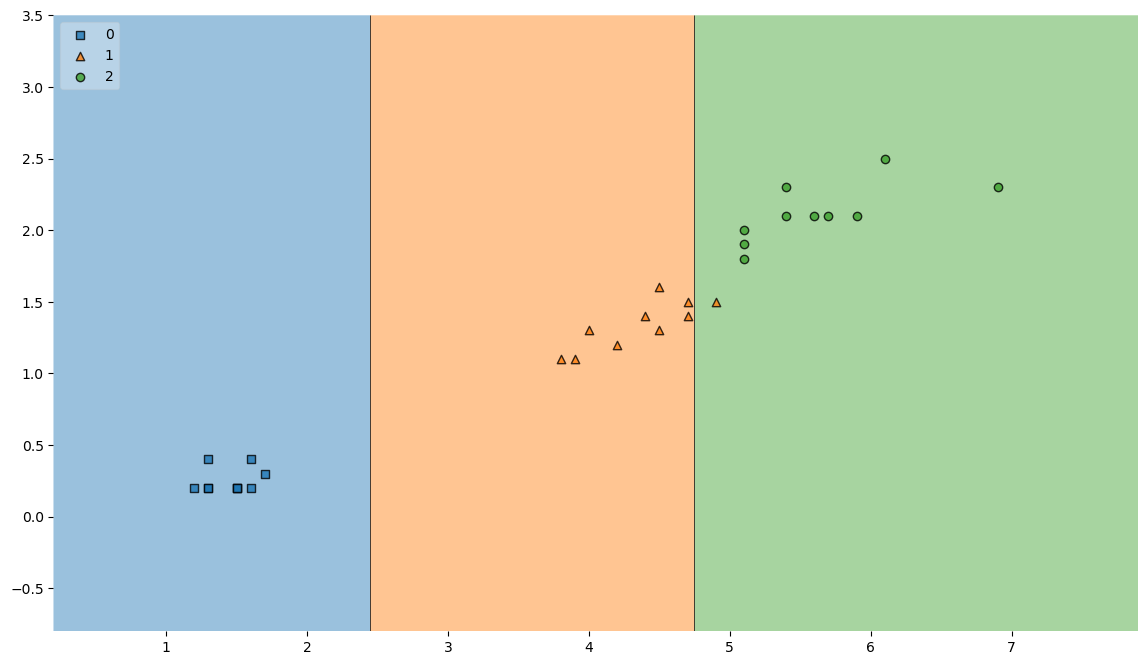

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show() # 결정경계를 그림

<Axes: >

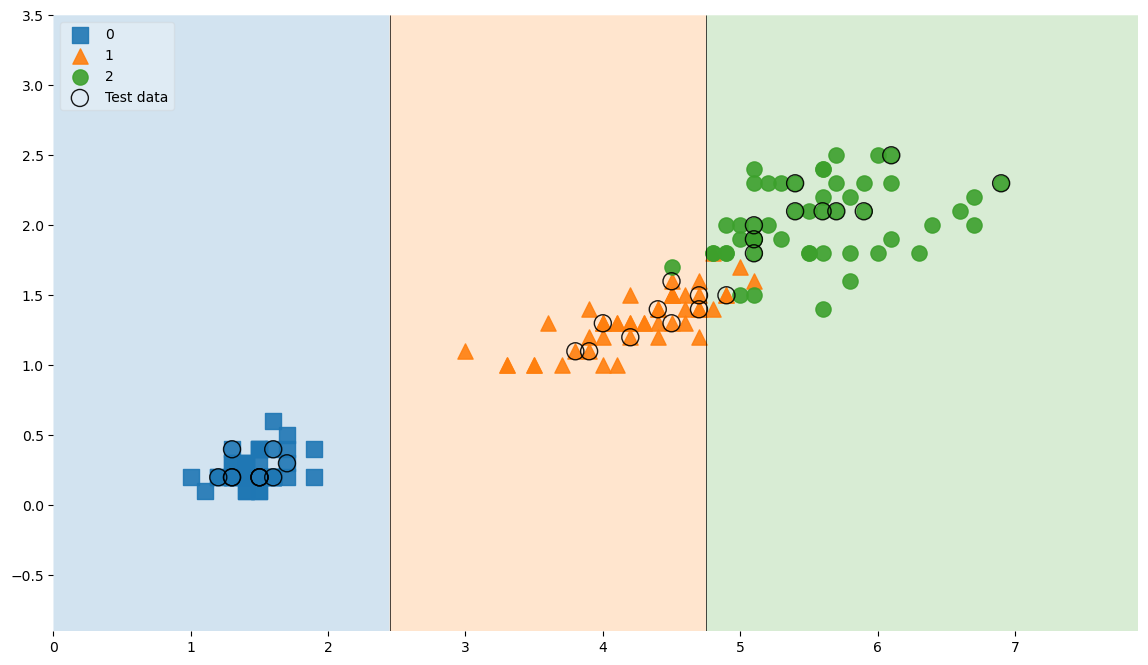

In [21]:
scatter_highlight_kwargs = {'s': 150, 'label':'Test data', 'alpha':0.9} # 테스트 데이터를 표시하기 위한 옵션
scatter_kwargs = {'s': 120 ,'edgecolor': None, 'alpha':0.9}


plt.figure(figsize=(14,8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test,
                      clf=iris_tree,
                      legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha': 0.2}
                      ) # 등고선의 투명도)
                       



In [22]:
features = iris.data
labels = iris.target 

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, 
                                                    stratify=labels, # 레이블의 비율을 맞춰줌
                                                    random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [31]:
test_data = np.array([[4.3, 2.,1.2,1.]])
iris_tree.predict(test_data)

array([1])

In [34]:
test_data.shape 

(1, 4)

In [33]:
np.array([4.3, 2., 2.2,1.]).shape

(4,)

In [36]:
iris_tree.predict_proba(test_data) # 각 클래스에 속할 확률

array([[0.        , 0.97222222, 0.02777778]])

In [37]:
iris.target_names[iris_tree.predict(test_data)] #1번 클래스로 예측

array(['versicolor'], dtype='<U10')

In [38]:
# 주요 특성 확인하기


iris_tree.feature_importances_ # 각 특성의 중요도

array([0.        , 0.        , 0.42189781, 0.57810219])

In [39]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}

In [40]:
# zip 과 언패킹

list1 = ['a','b','c']
list2 = [1,2,3]


In [41]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [43]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [44]:
dict(zip(list1, list2)) # zip을 이용해서 딕셔너리를 만들 수 있음

{'a': 1, 'b': 2, 'c': 3}

In [45]:
x,y = zip(*pairs) # zip을 이용해서 언패킹


In [46]:
x

('a', 'b', 'c')

In [47]:
y

(1, 2, 3)

In [48]:
list(x)

['a', 'b', 'c']

In [49]:
list(y)

[1, 2, 3]